# Boston House Price Prediction

# 4) Data Analytics I
Create a Linear Regression Model using Python/R to predict home prices using Boston Housing Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains 
information about various houses in Boston through different parameters. There are 506 samples and 14 feature variables in this dataset.

The objective is to predict the value of prices of the house using the given features.

*In this project we are going to use Machine Learning to predict the house prices of city named Boston in US.*

*The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970.*

*There are several features given for a house and we have to predicts its value as accurate as possible.*

# 0. Overview

Below is the overview of the whole project, what all things we will be doing, step wise.


- 1. Importing Libraries


- 2. Exploring Dataset
    - 2.1. We will be importing the dataset using Pandas library.
    - 2.2. Finding variables which are useful for prediction.


- 3. Univariate and Multivariate Analysis  
    - 3.1 MEDV
    - 3.2 TAX
    - 3.3 PTRATIO
    - 3.4 LSTAT
    - 3.5 RM


- 4. Splitting Dataset into Train and Test Set


- 5. Multiple Linear Regression
    - 5.1 Model Prepration
    - 5.2 Model Evaluation
    - 5.3 Model Interpretation




- 6. Conclusion
---

# 1. Importing Libraries

First we are importing all the important libraries we are going to use in this project and if we need any other library, we will import it at that time only.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings #to remove warning from the notebook
warnings.filterwarnings(action='ignore')

# 2. Exploring Dataset

## 2.1 Loading Dataset

Here we are going to import our **Boston House Price** dataset and will see how it looks o_o

In [3]:
#loading dataset
name= ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv(r"C:\Users\chait\Downloads\EXPERIMENT-4-20230524T114526Z-001\EXPERIMENT-4\housing_data.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


**Boston House Price** dataset has 14 features and their description is given as follows:
- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per dollar 10,000.
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population
- MEDV     Median value of owner-occupied homes in $1000's

Here main thing to notice is that **MEDV** is the outcome variable which we need to predict and all other variables are predictor variables.

In [4]:
#shape of our dataset
df.shape

(506, 14)

This data set has 14 features and 506 rows i.e. details of 506 houses.

In [5]:
#information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


We can see that all features in the dataset are numeric type either float or int. There is no categorical variable, which makes our life little easier here :)

In [6]:
#checking for missing data
df.isnull().sum()
#there is no missing value in the data

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

We noticed that there are *No Missing* values in the dataset which again reduced our work load. Cheers!

## 2.2 Finding variables which are useful for prediction

<AxesSubplot:>

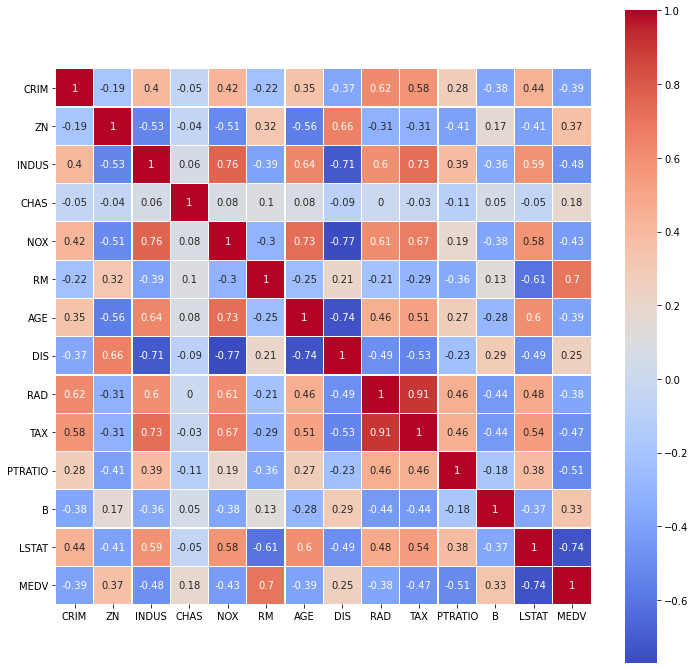

In [7]:
plt.figure(figsize=(12,12))
sns.heatmap(data=df.corr().round(2),annot=True,cmap='coolwarm',linewidths=0.2,square=True)

The Big colorful picture above which is called *Heatmap* helps us to understand how features are correlated to each other.
- Postive sign implies postive correlation between two features whereas Negative sign implies negative correlation between two features.


- I am here interested to know which features have good correlation with our dependent variable MEDV and can help in having good predictions.


- I observed that INDUS, RM, TAX, PTRATIO and LSTAT shows some good correaltion with MEDV and I am interested to know more about them.


- However I noticed that INDUS shows good correlation with TAX and LSAT which is a pain point for us :(
  
  because it leads to **Multicollinearity**. So I decided NOT to consider this feature and do further analysis with other 5 remaining features.

In [8]:
#since some of these features shows quite good and very good correlation with our predictive variable Houese Price(MEDV)
df1 = df[['RM','TAX','PTRATIO','LSTAT','MEDV']]
df1.head()

,RM,TAX,PTRATIO,LSTAT,MEDV
0,6.575,296,15.3,4.98,24.0
1,6.421,242,17.8,9.14,21.6
2,7.185,242,17.8,4.03,34.7
3,6.998,222,18.7,2.94,33.4
4,7.147,222,18.7,NaN,36.2


Now we have created a new dataset consisting of only those variables which we selected after analysing Heatmap.

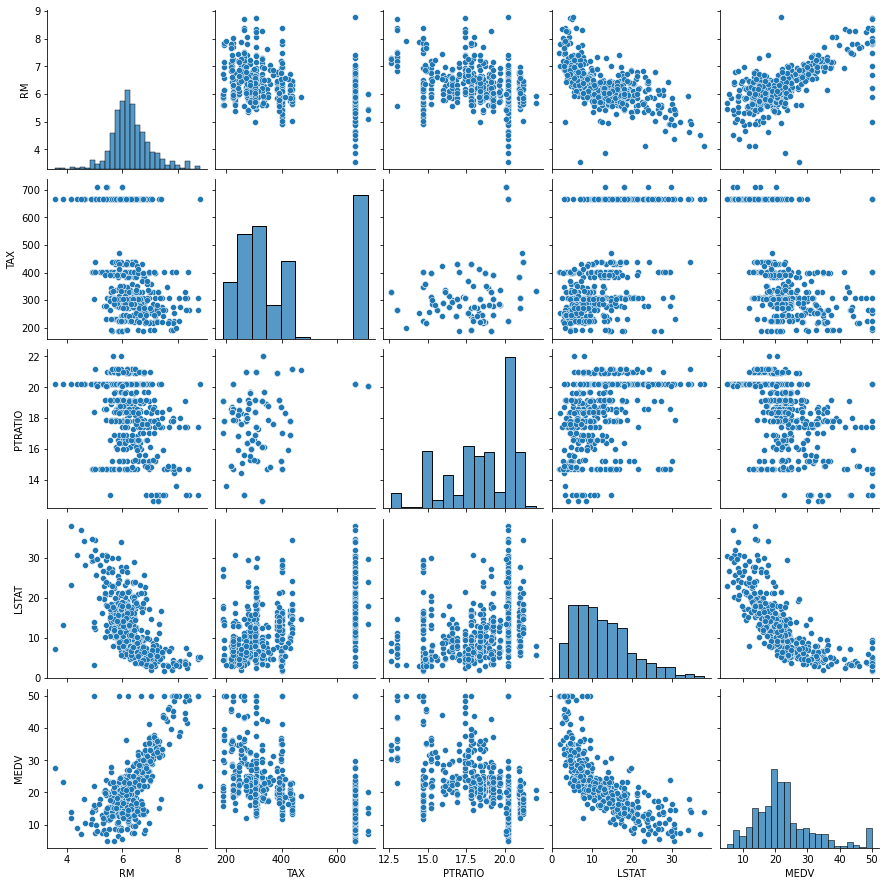

In [9]:
sns.pairplot(data=df1)

These 5x5 figures above helps us to understand how data in each variable (feature) is distributed with itself and with others.

**Observations**
- As we can see that RM, LSTAT and MEDV are quite normally distributed.


- Also we can see that RM and LSTAT shows kind of good Linear relationship with MEDV.


- There seems to have presence of some outliers in the dataset, we will study about them in some time.

In [10]:
#description about data
desc = df1.describe().round(2)
desc

,RM,TAX,PTRATIO,LSTAT,MEDV
count,506.00,506.00,506.00,486.00,506.00
mean,6.28,408.24,18.46,12.72,22.53
std,0.70,168.54,2.16,7.16,9.20
min,3.56,187.00,12.60,1.73,5.00
25%,5.89,279.00,17.40,7.12,17.02
50%,6.21,330.00,19.05,11.43,21.20
75%,6.62,666.00,20.20,16.96,25.00
max,8.78,711.00,22.00,37.97,50.00


Above table displays measures of central tendency like Mean, Median (50%) etc. We can see number of entries for each variable which is same as 506.

**Observations**
- Maximum value in MEDV and LSTAT are much higher than 75% of data points, which is kind of alarming situtaion for me.


- We will study each of the feature seprately and see how data is distributed and if there are any outliers or not.

# 3. Univariate and Multivariate Analysis

## 3.1 MEDV

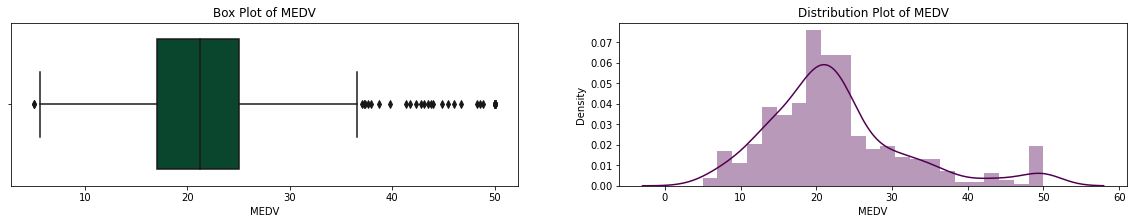

In [11]:
#Box Plot and Distribution Plot for Dependent variable MEDV
plt.figure(figsize=(20,3))

plt.subplot(1,2,1)
sns.boxplot(df1.MEDV,color='#005030')
plt.title('Box Plot of MEDV')

plt.subplot(1,2,2)
sns.distplot(a=df1.MEDV,color='#500050')
plt.title('Distribution Plot of MEDV')
plt.show()

From above two figures we can see observe that:
- MEDV is normally distributed
- It contains some extreme values which could be potential outliers

Next we are going to observe data points which lies outside wiskers.

*Q3 + 1.5 * IQR*  <  **Potential Outliers**  <  *Q1 - 1.5 * IQR*
- Q3 -> Quartile 3, Under which 75% of data lies
- Q1 -> Quartile 1, Under which 25% of data lies
- IQR -> Inter-Quartile Range, Q3 - Q1

In [12]:
MEDV_Q3 = desc['MEDV']['75%']
MEDV_Q1 = desc['MEDV']['25%']
MEDV_IQR = MEDV_Q3 - MEDV_Q1
MEDV_UV = MEDV_Q3 + 1.5*MEDV_IQR
MEDV_LV = MEDV_Q1 - 1.5*MEDV_IQR

df1[df1['MEDV']<MEDV_LV]

,RM,TAX,PTRATIO,LSTAT,MEDV
398,5.453,666,20.2,30.59,5.0
405,5.683,666,20.2,22.98,5.0


**Observations:**
- For these two low house prices, we can see that TAX = 666 which is very high for a house with approx 5 rooms.
- For these two low house prices, we can see that LSTAT is also  high.

**Conclusion:**
- Since both TAX and LSTAT are negatively correlated to MEDV which means higher the TAX and LSTAT lower will be the house price and vica-versa.
- I find it meaningful to have such low house prices.
- Therefore, I will keep these data points.

In [13]:
df1[df1['MEDV']>MEDV_UV].sort_values(by=['MEDV','RM'])

,RM,TAX,PTRATIO,LSTAT,MEDV
190,6.951,398,15.2,5.10,37.0
179,6.980,193,17.8,5.04,37.2
291,7.148,245,19.2,3.56,37.3
226,8.040,307,17.4,NaN,37.6
182,7.155,193,17.8,4.82,37.9
97,8.069,276,18.0,4.21,38.7
180,7.765,193,17.8,7.56,39.8
157,6.943,403,14.7,4.59,41.3
232,8.337,307,17.4,2.47,41.7
202,7.610,348,14.7,3.11,42.3


**Observations:**
- For house prices = 50, it is observed that number of Room ranges from 5 to 9 (approx.) which is quite unusual.
- Also for these houses TAX ranges from low to high.
- For houses price between 37 to less than 50, RM is higher than 75% of the total data points. Since RM is positively correlated to MEDV, so this could be reason for little higher house prices.
- Also for these houses PTRATIO and LSTAT lies in 25% - 50% of the total observation respectively. Since PTRATIO and LSAT are negatively correlated to MEDV so this could be reason for little higher house prices.

**Conclusion:**
- I am going to DROP ALL entries whose MEDV = 50 because I feel these entries are outliers and can create problem in having good predicitions.
- I am going to keep all entries having MEDV between 37 to less than 50, since I could not observe any unusual behaviour for them.

In [14]:
print(f'Shape of dataset before remving Outliers: {df1.shape}')
df2 = df1[~(df1['MEDV']==50)]
print(f'Shape of dataset after remving Outliers: {df2.shape}')

Shape of dataset before remving Outliers: (506, 5)
Shape of dataset after remving Outliers: (490, 5)


As we can see that we have deleted 16 rows from out dataset having MEDV = 50

## 3.2 TAX

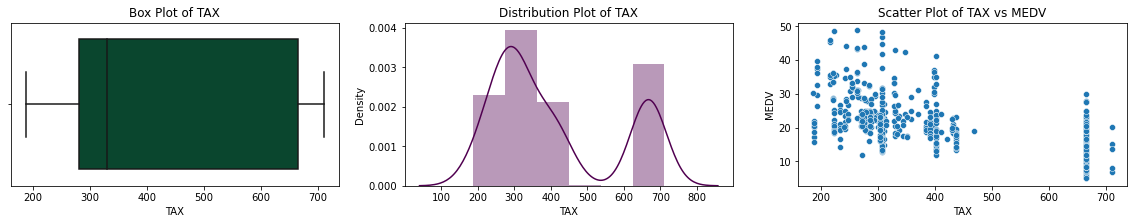

In [15]:
#Box Plot, Distribution Plot and Scatter Plot for TAX
plt.figure(figsize=(20,3))

plt.subplot(1,3,1)
sns.boxplot(df2.TAX,color='#005030')
plt.title('Box Plot of TAX')

plt.subplot(1,3,2)
sns.distplot(a=df2.TAX,color='#500050')
plt.title('Distribution Plot of TAX')

plt.subplot(1,3,3)
sns.scatterplot(df2.TAX,df2.MEDV)
plt.title('Scatter Plot of TAX vs MEDV')

plt.show()

From above three figures we can observe that:
- TAX is NOT normally distributed
- Though Boxplot does not show any outlier but there are some extreme TAX values in the dataset which is bothering me.
- Also from the scatter plot we can observe that for these extreme TAX values, MEDV ranges from low to high.

In [16]:
temp_df = df2[df1['TAX']>600].sort_values(by=['RM','MEDV'])
temp_df.shape

(132, 5)

There are total 132 entries in TAX mostly having value 666 which I thinks is a *DEVIL'S* number. Now lets deep dive inside them.

In [17]:
temp_df

,RM,TAX,PTRATIO,LSTAT,MEDV
365,3.561,666,20.2,7.12,27.5
367,3.863,666,20.2,13.33,23.1
406,4.138,666,20.2,23.34,11.9
374,4.138,666,20.2,37.97,13.8
384,4.368,666,20.2,30.63,8.8
...,...,...,...,...,...
473,6.980,666,20.2,NaN,29.8
482,7.061,666,20.2,7.01,25.0
375,7.313,666,20.2,13.44,15.0
453,7.393,666,20.2,16.74,17.8


In [18]:
temp_df.describe()

,RM,TAX,PTRATIO,LSTAT,MEDV
count,132.000000,132.000000,132.000000,126.000000,132.000000
mean,6.000689,667.704545,20.196212,19.181190,14.994697
std,0.712621,8.623365,0.019163,6.539503,5.405825
min,3.561000,666.000000,20.100000,5.290000,5.000000
25%,5.674250,666.000000,20.200000,14.662500,10.900000
50%,6.139500,666.000000,20.200000,18.065000,14.100000
75%,6.407250,666.000000,20.200000,23.285000,19.200000
max,8.780000,711.000000,20.200000,37.970000,29.800000


**Observations:**
- RM for these entries lies between 3.5 to 8.78.
- PTRATIO for almost all of these entries is same and equal to 20.20.
- LSTAT for these entries lies between 2.96 to 37.97.
- MEDV for these entries lies between 5 to 29.80.
- All these observations are very unusual, it seems impossible to have such high TAX values for all these houses.
- These values most likely missing values which were imputed casually by someone.

**Conclusion:**
- Since LSTAT is most correlated to TAX as seen above in Heatmap, so I am going to replace those 132 TAX values with mean of remaining TAX values dividing in some intervals with the help of LSTAT.
- Interval 1: TAX_10 -> Replacing extreme TAX values having LSTAT is between 0 to 10 with mean of other TAX values whose LSTAT is between 0 to 10.
- Interval 2: TAX_20 -> Replacing extreme TAX values having LSTAT is between 10 to 20 with mean of other TAX values whose LSTAT is between 10 to 20.
- Interval 3: TAX_30 -> Replacing extreme TAX values having LSTAT is between 20 to 30 with mean of other TAX values whose LSTAT is between 20 to 30.
- Interval 4: TAX_40 -> Replacing extreme TAX values having LSTAT >= 30 with mean of other TAX values whose LSTAT >= 30.

In [19]:
TAX_10 = df2[(df2['TAX']<600) & (df2['LSTAT']>=0) & (df2['LSTAT']<10)]['TAX'].mean()
TAX_20 = df2[(df2['TAX']<600) & (df2['LSTAT']>=10) & (df2['LSTAT']<20)]['TAX'].mean()
TAX_30 = df2[(df2['TAX']<600) & (df2['LSTAT']>=20) & (df2['LSTAT']<30)]['TAX'].mean()
TAX_40 = df2[(df2['TAX']<600) & (df2['LSTAT']>=30)]['TAX'].mean()

indexes = list(df2.index)
for i in indexes:
    if df2['TAX'][i] > 600:
        if (0 <= df2['LSTAT'][i] < 10):
            df2.at[i,'TAX'] = TAX_10
        elif (10 <= df2['LSTAT'][i] < 20):
            df2.at[i,'TAX'] = TAX_20
        elif (20 <= df2['LSTAT'][i] < 30):
            df2.at[i,'TAX'] = TAX_30
        elif (df2['LSTAT'][i] >30):
            df2.at[i,'TAX'] = TAX_40

print('Values imputed successfully')

Values imputed successfully


In [20]:
#This show all those extreme TAX values are replaced successfully
df2[df2['TAX']>600]['TAX'].count()

6

This shows that those values are replaced succesfully :)

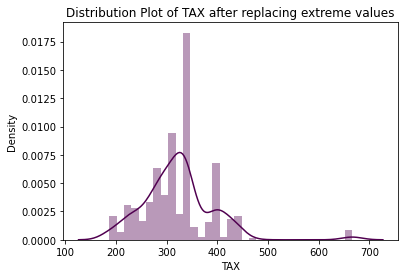

In [21]:
sns.distplot(a=df2.TAX,color='#500050')
plt.title('Distribution Plot of TAX after replacing extreme values')
plt.show()

## 3.3 PTRATIO

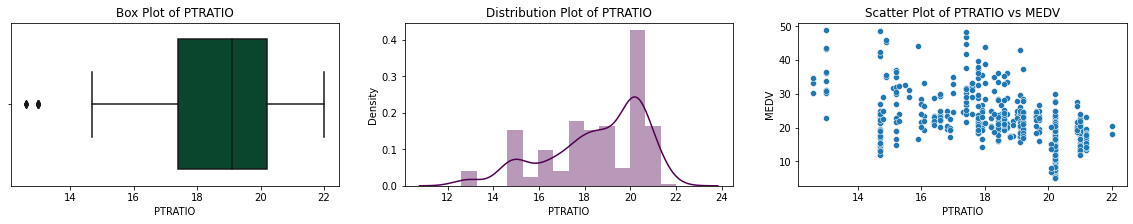

In [22]:
#Box Plot, Distribution Plot and Scatter Plot for PTRATIO
plt.figure(figsize=(20,3))

plt.subplot(1,3,1)
sns.boxplot(df2.PTRATIO,color='#005030')
plt.title('Box Plot of PTRATIO')

plt.subplot(1,3,2)
sns.distplot(a=df2.PTRATIO,color='#500050')
plt.title('Distribution Plot of PTRATIO')

plt.subplot(1,3,3)
sns.scatterplot(df2.PTRATIO,df2.MEDV)
plt.title('Scatter Plot of PTRATIO vs MEDV')

plt.show()

From above three figures we can observe that:
- PTRATIO is NOT normally distributed
- There are few low PRATIO values in the dataset which is bothering me.

In [23]:
df2[df2['PTRATIO']<14].sort_values(by=['LSTAT','MEDV'])

,RM,TAX,PTRATIO,LSTAT,MEDV
268,7.470,264,13.0,3.16,43.5
196,7.287,329,12.6,4.08,33.3
262,8.398,264,13.0,5.91,48.8
198,7.274,329,12.6,6.62,34.6
259,6.842,264,13.0,6.90,30.1
261,7.520,264,13.0,7.26,43.1
258,7.333,264,13.0,7.79,36.0
264,7.206,264,13.0,8.10,36.5
197,7.107,329,12.6,8.61,30.3
260,7.203,264,13.0,9.59,33.8


**Observations:**
- PTRATIO for all above data points is same.
- RM and MEDV is increasing simultaneously, as RM and MEDV are positively correlated, which is fine.
- As LSTAT increases MEDV decreases, which follows negative correlation.

**Conclusion:**
- I don't observe any unusual behaviour for these data points. Therefore, I will keep them.

## 3.4 LSTAT

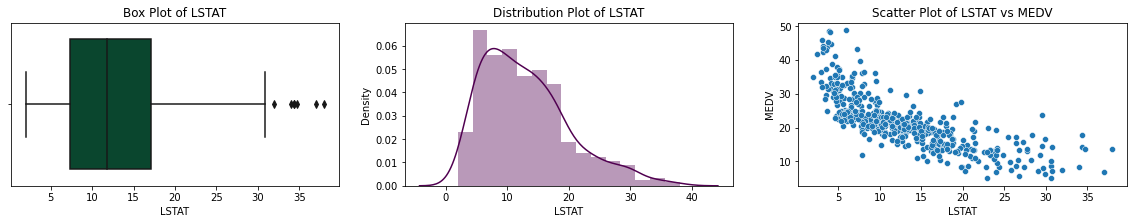

In [24]:
#Box Plot, Distribution Plot and Scatter Plot for LSTAT
plt.figure(figsize=(20,3))

plt.subplot(1,3,1)
sns.boxplot(df2.LSTAT,color='#005030')
plt.title('Box Plot of LSTAT')

plt.subplot(1,3,2)
sns.distplot(a=df2.LSTAT,color='#500050')
plt.title('Distribution Plot of LSTAT')

plt.subplot(1,3,3)
sns.scatterplot(df2.LSTAT,df2.MEDV)
plt.title('Scatter Plot of LSTAT vs MEDV')

plt.show()

From above three figures we can observe that:
- LSTAT is  normally distributed and skewed to right.
- There are some high LSTAT values in the dataset which we will analyse.

In [25]:
LSTAT_Q3 = desc['LSTAT']['75%']
LSTAT_Q1 = desc['LSTAT']['25%']
LSTAT_IQR = LSTAT_Q3 - LSTAT_Q1
LSTAT_UV = LSTAT_Q3 + 1.5*LSTAT_IQR
LSTAT_LV = LSTAT_Q1 - 1.5*LSTAT_IQR

df2[df2['LSTAT']>LSTAT_UV].sort_values(by='LSTAT')

,RM,TAX,PTRATIO,LSTAT,MEDV
387,5.000,335,20.2,31.99,7.4
438,5.935,335,20.2,34.02,8.4
412,4.628,335,20.2,34.37,17.9
141,5.019,437,21.2,34.41,14.4
373,4.906,335,20.2,34.77,13.8
414,4.519,335,20.2,36.98,7.0
374,4.138,335,20.2,37.97,13.8


**Observations:**
- From above data, I observed that since LSAT value for these 7 houses is high resulting in low MEDV, which follows the negative correaltion and is True.
- RM is low and TAX is little higher which means low MEDV and which is True.

**Conclusion:**
- I don't find any strong reason  to exclude these data points. Therefore, I will keep this data also for our model

## 3.5 RM

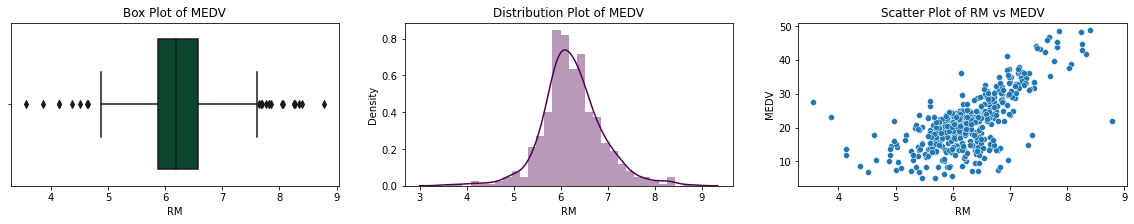

In [26]:
#Box Plot, Distribution Plot and Scatter Plot for RM
plt.figure(figsize=(20,3))

plt.subplot(1,3,1)
sns.boxplot(df2.RM,color='#005030')
plt.title('Box Plot of MEDV')

plt.subplot(1,3,2)
sns.distplot(a=df2.RM,color='#500050')
plt.title('Distribution Plot of MEDV')

plt.subplot(1,3,3)
sns.scatterplot(df2.RM,df2.MEDV)
plt.title('Scatter Plot of RM vs MEDV')

plt.show()

From above three figures we can observe that:
- RM is normally distributed .
- There are some low and high RM values in the dataset which we will analyse.
- Scatter plot of RM vs MEDV show good Positive Linear Relationship.

In [27]:
RM_Q3 = desc['RM']['75%']
RM_Q1 = desc['RM']['25%']
RM_IQR = RM_Q3 - RM_Q1
RM_UV = RM_Q3 + 1.5*RM_IQR
RM_LV = RM_Q1 - 1.5*RM_IQR

df2[df2['RM']<RM_LV].sort_values(by=['RM','MEDV'])

,RM,TAX,PTRATIO,LSTAT,MEDV
365,3.561,294,20.2,7.12,27.5
367,3.863,334,20.2,13.33,23.1
406,4.138,338,20.2,23.34,11.9
374,4.138,335,20.2,37.97,13.8
384,4.368,335,20.2,30.63,8.8
414,4.519,335,20.2,36.98,7.0
412,4.628,335,20.2,34.37,17.9
386,4.652,338,20.2,28.28,10.5


**Observations:**
- I am more concerned about two data points (row index - 365 & 367) where MEDV is higher while RM is very low, though RM and MEDV are positively correlated.
- Also for these two data points TAX and PTRATIO are above 50% of data points respectively, though both are negatively correlated to MEDV.
- For rest data points, I don't see any unusual behaviour.

**Conclusion:**
- I am going to delete those two data points (row index - 365 & 367) as it may influence the prediction capability of our model.
- Also I am going to keep all other points.

In [28]:
print(f'Shape of dataset before removing data points: {df2.shape}')
df3 = df2.drop(axis=0,index=[365,367])
print(f'Shape of dataset before removing data points: {df3.shape}')

Shape of dataset before removing data points: (490, 5)
Shape of dataset before removing data points: (488, 5)


We can see in the difference of shape of dataset after removing two data points (outliers).

In [29]:
df3[df3['RM']>RM_UV].sort_values(by=['RM','MEDV'])

,RM,TAX,PTRATIO,LSTAT,MEDV
180,7.765,193,17.8,7.56,39.8
98,7.820,276,18.0,3.57,43.8
280,7.820,216,14.9,3.76,45.4
203,7.853,224,14.7,3.81,48.5
226,8.040,307,17.4,NaN,37.6
97,8.069,276,18.0,4.21,38.7
233,8.247,307,17.4,3.95,48.3
253,8.259,330,19.1,3.54,42.8
224,8.266,307,17.4,4.14,44.8
232,8.337,307,17.4,2.47,41.7


**Observations:**
- In the above data points, I am more concerned about one data point only (row index - 364) where MEDV is very low while RM is very high, though RM and MEDV are positively correlated.
- Also for this data point LSTAT is low and MEDV is also low, though both are negatively correlated.
- For rest data points, I don't see any unusual behaviour.

**Conclusion:**
- I am going to delete the data point (row index - 364) as I believe this could be human error while inputting the data.
- Also I am going to keep all other points.

In [30]:
print(f'Shape of dataset before removing data points: {df3.shape}')
df3 = df3.drop(axis=0,index=[364])
print(f'Shape of dataset before removing data points: {df3.shape}')

Shape of dataset before removing data points: (488, 5)
Shape of dataset before removing data points: (487, 5)


We can see in the difference of shape of dataset after removing one data point (outlier).

---

Now, we are done with univariate and multivariate analysis and I feel data is ready to put into the **Black Box** i.e. model.

But before doing that we need to split our data into Training set and Test set and then we will make our model on Training set and test its accracy on Test set.

## 4. Splitting Dataset into Train and Test Set

In [31]:
#Now will split our dataset into Dependent variable and Independent variable

X = df3.iloc[:,0:4].values
y = df3.iloc[:,-1:].values

First, we have divided our data into two sets:

**X** contains all independent variables

**y** contains independent variable MEDV

In [32]:
print(f"Shape of Dependent Variable X = {X.shape}")
print(f"Shape of Independent Variable y = {y.shape}")

Shape of Dependent Variable X = (487, 4)
Shape of Independent Variable y = (487, 1)


In [33]:
def FeatureScaling(X):
    """
    is function takes an array as an input, which needs to be scaled down.
    Apply Standardization technique to it and scale down the features with mean = 0 and standard deviation = 1
    
    Input <- 2 dimensional numpy array
    Returns -> Numpy array after applying Feature Scaling
    """
    mean = np.mean(X,axis=0)
    std = np.std(X,axis=0)
    for i in range(X.shape[1]):
        X[:,i] = (X[:,i]-mean[i])/std[i]

    return X

- Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. 


- Few advantages of Feature Scaling the data are as follows:
    - It makes training of model faster.
    - It prevents the model from getting stuck in local optima.


- Here, we are using Standard Scalar which will scale Independent variables such that distribution is now centred around 0, with a Standard Deviation of 1.

In [34]:
X = FeatureScaling(X)

Set of Independent variables X is now scaled down.

In [35]:
m,n = X.shape
X = np.append(arr=np.ones((m,1)),values=X,axis=1)

We need to add a variable for **Bias** also. So, we are adding a new column of 1's in X as the fist column. 

In [36]:
#Now we will spit our data into Train set and Test Set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

print(f"Shape of X_train = {X_train.shape}")
print(f"Shape of X_test = {X_test.shape}")
print(f"Shape of y_train = {y_train.shape}")
print(f"Shape of y_test = {y_test.shape}")

Shape of X_train = (389, 5)
Shape of X_test = (98, 5)
Shape of y_train = (389, 1)
Shape of y_test = (98, 1)


Here we can see that we have split the data into Training Set (80% of total data) and Test Set (20% of total data)

# 5. Multiple Linear Regression
##### Here we are building Multiple Linear Regression from Scratch

## 5.1 Model Prepration

In [37]:
#ComputeCost function determines the cost (sum of squared errors) 

def ComputeCost(X,y,theta):
    """
    This function takes three inputs and uses the Cost Function to determine the cost (basically error of prediction vs
    actual values)
    Cost Function: Sum of square of error in predicted values divided by number of data points in the set
    J = 1/(2*m) *  Summation(Square(Predicted values - Actual values))
    
    Input <- Take three numoy array X,y and theta
    Return -> The cost calculated from the Cost Function
    """
    m=X.shape[0] #number of data points in the set
    J = (1/(2*m)) * np.sum((X.dot(theta) - y)**2)
    return J

This is the function which computes the Cost of sum of squared errors of our Multiple Linear Regression function.

In [38]:
#Gradient Descent Algorithm to minimize the Cost and find best parameters in order to get best line for our dataset

def GradientDescent(X,y,theta,alpha,no_of_iters):
    """
    Gradient Descent Algorithm to minimize the Cost
    
    Input <- X, y and theta are numpy arrays
            X -> Independent Variables/ Features
            y -> Dependent/ Target Variable
            theta -> Parameters 
            alpha -> Learning Rate i.e. size of each steps we take
            no_of_iters -> Number of iterations we want to perform
    
    Return -> theta (numpy array) which are the best parameters for our dataset to fit a linear line
             and Cost Computed (numpy array) for each iteration
    """
    m=X.shape[0]
    J_Cost = []
    for i in range(no_of_iters):
        error = np.dot(X.transpose(),(X.dot(theta)-y))
        theta = theta - alpha * (1/m) * error
        J_Cost.append(ComputeCost(X,y,theta))
    
    return theta, np.array(J_Cost)

This is our Gradient Descent Algorithm which will minimize the *Error in Prediction*.

Basically, it will find the best coefficients **theta** for our data which will represt Best Linear Line for our data.   

In [39]:
iters = 1000

alpha1 = 0.001
theta1 = np.zeros((X_train.shape[1],1))
theta1, J_Costs1 = GradientDescent(X_train,y_train,theta1,alpha1,iters)

alpha2 = 0.003
theta2 = np.zeros((X_train.shape[1],1))
theta2, J_Costs2 = GradientDescent(X_train,y_train,theta2,alpha2,iters)

alpha3 = 0.01
theta3 = np.zeros((X_train.shape[1],1))
theta3, J_Costs3 = GradientDescent(X_train,y_train,theta3,alpha3,iters)

alpha4 = 0.03
theta4 = np.zeros((X_train.shape[1],1))
theta4, J_Costs4 = GradientDescent(X_train,y_train,theta4,alpha4,iters)

- Now we run the Gradient Descent Algorithm using different **learning rate** *alpha*. Number of iterations we will be performing = 1000


- After that we will see what is *best learing rate* for our algorithm by visualizing the results.


- Finally we will get best *theta*, which represents the best linear line for our data.

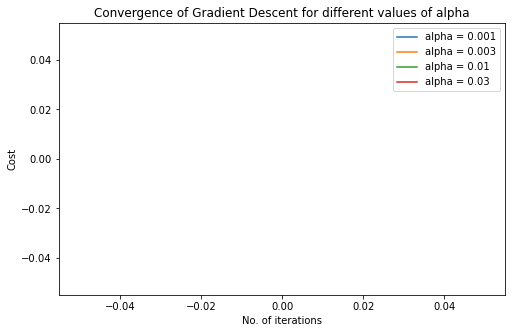

In [40]:
plt.figure(figsize=(8,5))
plt.plot(J_Costs1,label = 'alpha = 0.001')
plt.plot(J_Costs2,label = 'alpha = 0.003')
plt.plot(J_Costs3,label = 'alpha = 0.01')
plt.plot(J_Costs4,label = 'alpha = 0.03')
plt.title('Convergence of Gradient Descent for different values of alpha')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

**Observations:**
- We can see that for ***alpha = 0.03***, Gradient Descent algorithm converges to minimum much faster than for any other value of alpha (taken).


- We can see that Gradient Descent algorithm converged to minimum Cost somewhere before 50 iterations for *alpha = 0.03*.


- Gradient Descent convergenced fastest for *alpha = 0.03 -> 0.01 -> 0.003 -> 0.001*.


- Thus, the best value of *alpha = 0.03* and corrosponding to it we will get best *theta* which is equal to '*theta4*.

In [41]:
theta4

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan]])

Above is the value of theta corrosponding to alpha = 0.03

In [42]:
def Predict(X,theta):
    """
    This function predicts the result for the unseen data
    """
    y_pred = X.dot(theta)
    return y_pred

Predict fucntion predicts the house price i.e. MEDV on the new unseen data using the regression coefficients i.e. theta.

In [43]:
y_pred = Predict(X_test,theta4)
y_pred[:5]

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan]])

Predicted value for Test Set is saved in *y_pred* successfully.

## 5.2 Model Evaluation

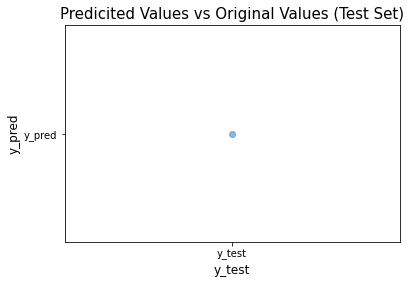

In [52]:
plt.scatter(x=y_test,y=y_pred,alpha=0.5)
plt.xlabel('y_test',size=12)



plt.ylabel('y_pred',size=12)
plt.title('Predicited Values vs Original Values (Test Set)',size=15)
plt.show()

In the above scatter plot we can see that the diagonal line is not that straight, which represents the differences in the actual and predictions.

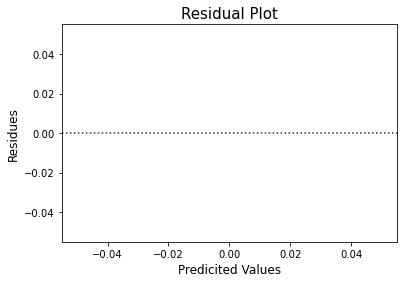

In [51]:
sns.residplot(y_pred,(y_pred-y_test))
plt.xlabel('Predicited Values',size=12)
plt.ylabel("Residues",size=12)
plt.title('Residual Plot',size=15)
plt.show()

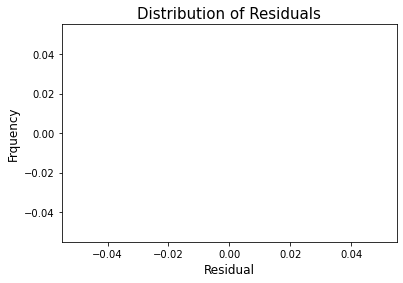

In [46]:
sns.distplot(y_pred-y_test)
plt.xlabel('Residual',size=12)
plt.ylabel('Frquency',size=12)
plt.title('Distribution of Residuals',size=15)
plt.show()

**Observations:**
- *Distribution of Residuals Plot* shows residuals are quite normally distributed.


- From above *Residual Plot*, I do not found any significant pattern in residues (errors or predicition).


- I can conclude that our model is neither under fitting nor over fitting the data.

In [47]:
from sklearn import metrics
r2= metrics.r2_score(y_test,y_pred)
N,p = X_test.shape
adj_r2 = 1-((1-r2)*(N-1))/(N-p-1)
print(f'R^2 = {r2}')
print(f'Adjusted R^2 = {adj_r2}')

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

*R square* value above is calcualted on Test Set, though it is not very good but still it explains quite good linear relationship among independent variable and dependent variables.

In [48]:
from sklearn import metrics
mse = metrics.mean_squared_error(y_test,y_pred)
mae = metrics.mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(f'Mean Squared Error: {mse}',f'Mean Absolute Error: {mae}',f'Root Mean Squared Error: {rmse}',sep='\n')

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

From above *Evaluation Metrices*, we can notice that Root Mean Squared Error is low for our Multiple Regression Model and that is good thing for us.

## 5.3 Model Interpretation

In [48]:
#coefficients of regression model
coeff=np.array([y for x in theta4 for y in x]).round(2)
features=['Bias','RM','TAX','PTRATIO','LSTAT']
eqn = 'MEDV = '
for f,c in zip(features,coeff):
    eqn+=f" + ({c} * {f})";

print(eqn)

MEDV =  + (21.74 * Bias) + (2.74 * RM) + (-1.06 * TAX) + (-1.93 * PTRATIO) + (-3.03 * LSTAT)


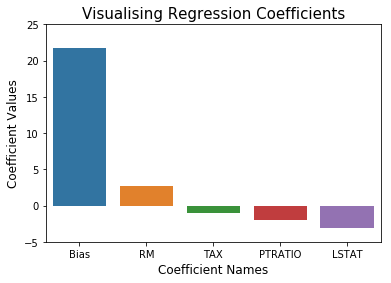

In [49]:
sns.barplot(x=features,y=coeff)
plt.ylim([-5,25])
plt.xlabel('Coefficient Names',size=12)
plt.ylabel('Coefficient Values',size=12)
plt.title('Visualising Regression Coefficients',size=15)
plt.show()

**Observations:**

 - **MEDV = (21.74 * Bias) + (2.74 * RM) + (-1.06 * TAX) + (-1.93 * PTRATIO) + (-3.03 * LSTAT)**


- From above equation we can conclude that, for 1 unit increase in RM the House Price will go up by 2.74 units and vica-versa, considering other factors remaining constant.


- Also for 1 unit increase in TAX the House Price will go down by 1.06 units and vica-versa, considering other factors remaining constant.


- Also for 1 unit increase in PTRATIO the House Price will go down by 1.93 units and vica-versa, considering other factors remaining constant.


- Also for 1 unit increase in LSTAT the House Price will go down by 3.03 units and vica-versa, considering other factors remaining constant.


(Above four observations are quite meaningful also, since RM is positively correlated to MEDV and TAX, PRTATIO & LSTAT are negatively correlated to MEDV.)

**Conclusion:**

- *As we know, as the number of rooms increases price of the house increases. Whereas if the number of lower class people is high in a region (LSTAT) or if the student-teacher ratio is bigger (PTRATIO) i.e. less number of teachers for more number of students or if TAX rate is more, obiously House price will gp down.*


- Our multiple regression model does not explains the data perfectly (as R sqare value is 0.77) but it still it explains the good relationship of House Price (i.e. MEDV) and other factors affecting the price.


- We will fit few more models on this dataset and at the end will choose the model which explains the data best among all models.
---